#Get files from Github

In [59]:
!git clone {"https://github.com/patsongco/41004-AI-Analytics-Capstone-Project"}

Cloning into '41004-AI-Analytics-Capstone-Project'...
remote: Enumerating objects: 40, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 40 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (40/40), done.


In [60]:
%cd 41004-AI-Analytics-Capstone-Project/data

/content/drive/My Drive/Colab Notebooks/My Project Folder/analytics_capstone/41004-AI-Analytics-Capstone-Project/data


In [61]:
!ls

final_cleaned_crypto_bernardamus_network_edges.csv  nodes_train_balanced.csv
final_cleaned_crypto_bernardamus_network_nodes.csv  nodes_train.csv
nodes_test_balanced.csv				    nodes_validate_balanced.csv
nodes_test.csv					    nodes_validate.csv


In [62]:
e = pd .read_csv("final_cleaned_crypto_bernardamus_network_edges.csv")

In [63]:
e.head()

,Unnamed: 0,Source,Target,hashtag
0,0,drumkitt87,cryptomichnl,ethereum
1,1,drumkitt87,fatihsk87,ethereum
2,2,cryptomichnl,fatihsk87,ethereum
3,3,sp889900,rewardiqa,binance
4,4,sp889900,rewardiqa,rew


In [ ]:
e=e.drop(["Unnamed: 0"], axis=1)

In [ ]:
e.head()

,Source,Target,hashtag
0,drumkitt87,cryptomichnl,ethereum
1,drumkitt87,fatihsk87,ethereum
2,cryptomichnl,fatihsk87,ethereum
3,sp889900,rewardiqa,binance
4,sp889900,rewardiqa,rew


###Read file to DataFrame

In [ ]:
import pandas as pd
nodes = pd.read_csv("crypto_bernardamus_network_nodes.csv")

In [ ]:
nodes.shape

(5001, 14)

In [ ]:
nodes.head()

,Id,Label,timeset,twitter_type,created_at,description,profile_image,friends_count,followers_count,real_name,location,emoji_alias,emoji_html_decimal,emoji_utf8
0,@drumkitt87,@drumkitt87,<[2021-03-29T19:58:33.398+11:00]>,User,Sun Mar 30 12:40:05 AEDT 2008,Former professional drummer for the likes of A...,http://pbs.twimg.com/profile_images/1335678078...,649.0,321.0,CK Nomad,"Atlanta, Ga",NaN,NaN,NaN
1,@cryptomichnl,@cryptomichnl,"<[2021-03-29T19:58:33.398+11:00, 2021-03-29T19...",User,Thu May 20 21:34:14 AEST 2010,Full Time Trader from Amsterdam Stock Exchange...,http://pbs.twimg.com/profile_images/1347904368...,536.0,181293.0,Michaël van de Poppe,"Amsterdam, The Netherlands",NaN,NaN,NaN
2,@fatihsk87,@fatihsk87,"<[2021-03-29T19:58:33.398+11:00, 2021-03-29T19...",User,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,@sp889900,@sp889900,<[2021-03-29T19:58:33.509+11:00]>,User,Fri Nov 23 15:25:04 AEDT 2018,@spaulll,http://pbs.twimg.com/profile_images/1363685893...,444.0,129.0,s. pαul,I AM FROM INDIA,NaN,NaN,NaN
4,@rewardiqa,@rewardiqa,"<[2021-03-29T19:58:33.509+11:00, 2021-03-29T19...",User,Fri Nov 29 04:36:18 AEDT 2019,Rewardiqa combines some of the best features o...,http://pbs.twimg.com/profile_images/1235340069...,90.0,79440.0,Rewardiqa foundation,NaN,NaN,NaN,NaN


#Data Cleaning Step

###Import libraries and Twitter API keys

In [ ]:
# Import all needed libraries
import tweepy                   # Python wrapper around Twitter API
import json
import csv
from datetime import date
from datetime import datetime
import time

api_key = "WjZT3AxtdR26SLT1VywCs2ZUG"
api_secret_key = "C7467NjFwp9Hz1IK9PIxBEbfMmXwljcyd9tSx4FA62afMqBZk9"
access_token = "4708563396-2YUZuILIV8uQfU51bSm4WeMKrGbBnLtThr6wVAZ"
access_token_secret = "vwQnbyGEox0rmVAiNyB7AXz2H65N8x3HcK2HZEcZcq77B"

# Connect to Twitter API using the secrets
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

###Using Twitter API endoint
* Get Users JSON file and append to user_list
* If user does not exist append to deleted_user_list


###Create DataFrame with selected user attributes

1. (Object) Screen Name
2. (int64) Twitter Id
3. (int64) Age of account in years - spammmers generally have new accounts
4. (int64) Numbers of followers - spammers have less number of followers
5. (int64) Numbers of followings - spammers tend to follow a large number of users
6. (float64) Followers/Following ratio - this ratio is less than 1 for spammers
7. (int64) URL in description - 1 if true else 0
8. (int64) Verified Twitter account - 1 if true else 0
9. (int64) Number of tweets (including retweets) issued by the user
10. (int64) The number of Tweets this user has liked in the account’s lifetime
11. (int64) The number of public lists that this user is a member of



In [ ]:
from pandas import DataFrame
import time
user_list = []
deleted_user_list = []
deleted_user_idx = []

df_user_list = []
size = nodes.shape[0]

for i in range(size):
  try:
    u = api.get_user(nodes.iloc[i,0])
    #convert json to iterable string
    json_str = json.dumps(u._json)
    data = json.loads(json_str)

    df_user = []

    #Screen Name
    df_user.append(data['screen_name'])
    #Id
    df_user.append(data['id'])
    #Calculate age of account in years
    t = data['created_at']
    df_user.append(2021 - int(t[-4:])) 
    #Number of Followers
    followers = int(data['followers_count'])
    df_user.append(followers)
    #Number of Followings
    followings = int(data['friends_count'])
    df_user.append(followings)
    #Follower/Followings ratio
    if (followings == 0):
      df_user.append(0)
    else:
      df_user.append(followers/followings)
    #If URL present in user (1) else (0)
    if data['url'] is None:
      df_user.append(0)
    else:
      df_user.append(1)
    #If verified user (1) else (0)
    if data['verified']:
      df_user.append(1)
    else:
      df_user.append(0)
    #Number of tweets (including retweets) issued by the user
    df_user.append(data['statuses_count'])
    #The number of Tweets this user has liked in the account’s lifetime
    df_user.append(data['favourites_count'])
    #The number of public lists that this user is a member of
    df_user.append(data['listed_count'])

    df_user_list.append(df_user)
    user_list.append(u)
    if (len(user_list) % 100 == 0):
      print(len(user_list))

  except tweepy.RateLimitError:
    print('sleep 15 minutes')
    time.sleep(900)
    continue

  except tweepy.TweepError as e:
    print(e)
    print('Account %s'% nodes.iloc[i,0])
    deleted_user_list.append(nodes.iloc[i,0])
    deleted_user_idx.append(i)
    continue

df = DataFrame(df_user_list,columns=['Screen Name','Id','Age in Years','# of Followers','# of Followings','Follower/Following Ratio','URL','Verified','Number of Tweets','# of liked Tweets','# of lists'])

[{'code': 63, 'message': 'User has been suspended.'}]
Account @horanghaeey
100
[{'code': 63, 'message': 'User has been suspended.'}]
Account @btswifeuuuuuuuu
[{'code': 63, 'message': 'User has been suspended.'}]
Account @candymincyypal
200
[{'code': 50, 'message': 'User not found.'}]
Account @danielsdozie
300
[{'code': 63, 'message': 'User has been suspended.'}]
Account @walefinance
400
[{'code': 63, 'message': 'User has been suspended.'}]
Account @just_riego
500
600
[{'code': 63, 'message': 'User has been suspended.'}]
Account @1_ecosystem
700
[{'code': 63, 'message': 'User has been suspended.'}]
Account @gem_finding
[{'code': 63, 'message': 'User has been suspended.'}]
Account @icaruseries
800
[{'code': 63, 'message': 'User has been suspended.'}]
Account @betfury_io
[{'code': 63, 'message': 'User has been suspended.'}]
Account @_sunshineksn7
[{'code': 63, 'message': 'User has been suspended.'}]
Account @zerrbenz
sleep 15 minutes
900
[{'code': 63, 'message': 'User has been suspended.'

In [ ]:
df.to_csv("cleaned_crypto_bernardamus_network_nodes.csv")

In [ ]:
print(len(user_list))
print(len(deleted_user_list))
# print(deleted_user_list)
print(len(deleted_user_idx))
# print(deleted_user_idx)

4924
72
72


###Save deleted users to file

In [ ]:
deleted_list = []
for user in range(len(deleted_user_list)):
  user_idx_list = []
  user_idx_list.append(deleted_user_idx[user])
  user_idx_list.append(deleted_user_list[user])
  deleted_list.append(user_idx_list) 

In [ ]:
df2 = DataFrame(deleted_list,columns=['idx','Screen Name'])

In [ ]:
df2.head()

,idx,Screen Name
0,29,@horanghaeey
1,137,@btswifeuuuuuuuu
2,140,@candymincyypal
3,277,@danielsdozie
4,401,@walefinance


In [ ]:
df2.to_csv("deleted_user_list_idx")

In [ ]:
df.dtypes

Screen Name                  object
Id                            int64
Age in Years                  int64
# of Followers                int64
# of Followings               int64
Follower/Following Ratio    float64
URL                           int64
Verified                      int64
Number of Tweets              int64
# of liked Tweets             int64
# of list                     int64
dtype: object


- Reputation (ratio of followers to the sum of followers and followings) - spammers have repuation <1
- Avg. time between posts - spammers post more tweets in a short period of time in order to gain other's attention
- Posting time behaviour - spammers tend to post a fixed time schedule may be early morning or late night when genuine users dont use SNS
- Idle Hours - spammers keep sending messages so they have less idle hours
- Tweet frequency - spammers post tweets more frequently at odd times to get attention of other users
- No of hashtags - spammers tweet multiple unrelated updates to the most mentioned topics on Twitter using # to lure legitimate users






###Remove deleted users from Edges table

In [ ]:
edges = pd.read_csv("crypto_bernardamus_network_edges.csv")
print("edges shape: %s" %str(edges.shape))

edges shape: (14573, 9)


In [ ]:
edges.head()

,Source,Target,Type,Kind,Id,Label,timeset,Weight,hashtag
0,@drumkitt87,@cryptomichnl,Directed,#ethereum,0,#ethereum,"<[2021-03-29T19:58:33.398+11:00, 2021-03-29T19...",2,#ethereum
1,@drumkitt87,@fatihsk87,Directed,#ethereum,1,#ethereum,<[2021-03-29T19:58:33.398+11:00]>,1,#ethereum
2,@cryptomichnl,@fatihsk87,Directed,#ethereum,2,#ethereum,"<[2021-03-29T19:58:33.458+11:00, 2021-03-29T19...",45,#ethereum
3,@sp889900,@rewardiqa,Directed,#binance,3,#binance,"<[2021-03-29T19:58:33.509+11:00, 2021-03-29T19...",2,#binance
4,@sp889900,@rewardiqa,Directed,#rew,4,#rew,"<[2021-03-29T19:58:33.509+11:00, 2021-03-29T19...",2,#rew


In [ ]:
#remove unwanted columns
edges = edges[['Source','Target','hashtag']]
edges.head()

,Source,Target,hashtag
0,@drumkitt87,@cryptomichnl,#ethereum
1,@drumkitt87,@fatihsk87,#ethereum
2,@cryptomichnl,@fatihsk87,#ethereum
3,@sp889900,@rewardiqa,#binance
4,@sp889900,@rewardiqa,#rew


In [ ]:
cleaned_nodes = pd.read_csv("labelled_cleaned_crypto_bernardamus_network_nodes.csv")
cleaned_nodes.shape

(4924, 14)

In [ ]:
cleaned_nodes.head()

,Screen Name,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer,Bot: 3.5 Threshold,Bot: 4.0 Threshold
0,DrumKitt87,14254757,13,321,649,0.49,0,0,3009,28401,6,0.7,0,0
1,CryptoMichNL,146008010,11,181300,536,338.25,1,0,57312,43979,2367,0.9,0,0
2,FatihSK87,2665227374,7,73248,409,179.09,0,0,11859,7887,1882,0.3,0,0
3,SP889900,1065823520314140000,3,129,444,0.29,0,0,474,1438,0,1.6,0,0
4,rewardiqa,1200106100491720000,2,79551,90,883.90,1,0,45,98,14,1.6,0,0


In [ ]:
cleaned_user_list = []
deleted_user_list = []

for user in range(cleaned_nodes.shape[0]):
  cleaned_user_list.append(cleaned_nodes['Screen Name'][user].lower())
  
for i in range(nodes.shape[0]):
  if nodes['Id'][i][1:] not in cleaned_user_list:
    deleted_user_list.append(nodes['Id'][i][1:])

#remove duplicates if there are any
cleaned_user_list1 = []
[cleaned_user_list1.append(x) for x in cleaned_user_list if x not in cleaned_user_list1]
deleted_user_list1 = []
[deleted_user_list1.append(x) for x in deleted_user_list if x not in deleted_user_list1]

if len(cleaned_user_list) == len(cleaned_user_list1):
  print("no duplicates")
else: print("duplicates found")
if len(deleted_user_list) == len(deleted_user_list1):
  print("no duplicates")
else: print("duplicates found")

print(len(cleaned_user_list))
print(len(deleted_user_list))

no duplicates
no duplicates
4924
78


In [ ]:
edges.head()

,Source,Target,hashtag
0,@drumkitt87,@cryptomichnl,#ethereum
1,@drumkitt87,@fatihsk87,#ethereum
2,@cryptomichnl,@fatihsk87,#ethereum
3,@sp889900,@rewardiqa,#binance
4,@sp889900,@rewardiqa,#rew


In [ ]:
index = []
for i in range(len(deleted_user_list)):
  for j in range(edges.shape[0]):
    if deleted_user_list[i] == edges['Source'][j][1:] or deleted_user_list[i] == edges['Target'][j][1:]:
      #do not allow duplicate indexes to be appended
      if j not in index:
        index.append(j)
len(index)

323

In [ ]:
#drop indexed from edges table
for k in index:
  edges = edges.drop(index=k,axis=0)
edges.shape

(14250, 3)

In [ ]:
edges.head()

,Source,Target,hashtag
0,@drumkitt87,@cryptomichnl,#ethereum
1,@drumkitt87,@fatihsk87,#ethereum
2,@cryptomichnl,@fatihsk87,#ethereum
3,@sp889900,@rewardiqa,#binance
4,@sp889900,@rewardiqa,#rew


In [ ]:
#remove @ and #
for i in range(edges.shape[0]):
  edges.iloc[i,0] = edges.iloc[i,0][1:]

for j in range(edges.shape[0]):
  edges.iloc[j,1] = edges.iloc[j,1][1:]

for k in range(edges.shape[0]):
  edges.iloc[k,2] = edges.iloc[k,2][1:]

In [ ]:
edges.head()

,Source,Target,hashtag
0,drumkitt87,cryptomichnl,ethereum
1,drumkitt87,fatihsk87,ethereum
2,cryptomichnl,fatihsk87,ethereum
3,sp889900,rewardiqa,binance
4,sp889900,rewardiqa,rew


In [ ]:
edges.to_csv("final_cleaned_crypto_bernardamus_network_edges.csv")

###Convert 'Screen Name' to lower case

In [ ]:
cleaned_nodes.head()

,Screen Name,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer,Bot: 3.5 Threshold,Bot: 4.0 Threshold
0,DrumKitt87,14254757,13,321,649,0.49,0,0,3009,28401,6,0.7,0,0
1,CryptoMichNL,146008010,11,181300,536,338.25,1,0,57312,43979,2367,0.9,0,0
2,FatihSK87,2665227374,7,73248,409,179.09,0,0,11859,7887,1882,0.3,0,0
3,SP889900,1065823520314140000,3,129,444,0.29,0,0,474,1438,0,1.6,0,0
4,rewardiqa,1200106100491720000,2,79551,90,883.90,1,0,45,98,14,1.6,0,0


In [ ]:
for i in range(cleaned_nodes.shape[0]):
  cleaned_nodes.iloc[i,0] = cleaned_nodes.iloc[i,0].lower()

In [ ]:
cleaned_nodes.head()

,Screen Name,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer,Bot: 3.5 Threshold,Bot: 4.0 Threshold
0,drumkitt87,14254757,13,321,649,0.49,0,0,3009,28401,6,0.7,0,0
1,cryptomichnl,146008010,11,181300,536,338.25,1,0,57312,43979,2367,0.9,0,0
2,fatihsk87,2665227374,7,73248,409,179.09,0,0,11859,7887,1882,0.3,0,0
3,sp889900,1065823520314140000,3,129,444,0.29,0,0,474,1438,0,1.6,0,0
4,rewardiqa,1200106100491720000,2,79551,90,883.90,1,0,45,98,14,1.6,0,0


In [ ]:
cleaned_nodes.to_csv("final_cleaned_crypto_bernardamus_network_nodes.csv")

In [ ]:
cleaned_nodes.shape

(4924, 14)

In [ ]:
edges.shape

NameError: ignored

#Final Data Cleaning and Pre-Processing

In [ ]:
import pandas as pd

nodes = pd.read_csv("final_cleaned_crypto_bernardamus_network_nodes.csv")
edges = pd.read_csv("final_cleaned_crypto_bernardamus_network_edges.csv")

In [ ]:
nodes.head()

,Unnamed: 0,Screen Name,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer,Bot: 3.5 Threshold,Bot: 4.0 Threshold
0,0,drumkitt87,14254757,13,321,649,0.49,0,0,3009,28401,6,0.7,0,0
1,1,cryptomichnl,146008010,11,181300,536,338.25,1,0,57312,43979,2367,0.9,0,0
2,2,fatihsk87,2665227374,7,73248,409,179.09,0,0,11859,7887,1882,0.3,0,0
3,3,sp889900,1065823520314140000,3,129,444,0.29,0,0,474,1438,0,1.6,0,0
4,4,rewardiqa,1200106100491720000,2,79551,90,883.90,1,0,45,98,14,1.6,0,0


##Remove unwanted columns

In [ ]:
final_node_dataset = nodes.drop(["Unnamed: 0","Id","Botometer","Bot: 3.5 Threshold"], axis=1)

In [ ]:
final_node_dataset.head()

,Screen Name,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Bot: 4.0 Threshold
0,drumkitt87,13,321,649,0.49,0,0,3009,28401,6,0
1,cryptomichnl,11,181300,536,338.25,1,0,57312,43979,2367,0
2,fatihsk87,7,73248,409,179.09,0,0,11859,7887,1882,0
3,sp889900,3,129,444,0.29,0,0,474,1438,0,0
4,rewardiqa,2,79551,90,883.90,1,0,45,98,14,0


In [ ]:
final_edge_dataset = edges.drop(["Unnamed: 0"], axis=1)

In [ ]:
final_edge_dataset.head()

,Source,Target,hashtag
0,drumkitt87,cryptomichnl,ethereum
1,drumkitt87,fatihsk87,ethereum
2,cryptomichnl,fatihsk87,ethereum
3,sp889900,rewardiqa,binance
4,sp889900,rewardiqa,rew


##Create Training, Validation, Test Splits

In [ ]:
from sklearn.model_selection import train_test_split
from collections import Counter

X = final_node_dataset
y = final_node_dataset['Bot: 4.0 Threshold']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=100)
print(f"Training target statistics: {Counter(y_train)}")
print(f"Validation target statistics: {Counter(y_val)}")
print(f"Testing target statistics: {Counter(y_test)}")

Training target statistics: Counter({0: 2540, 1: 414})
Validation target statistics: Counter({0: 838, 1: 147})
Testing target statistics: Counter({0: 850, 1: 135})


In [ ]:
print("train shape: %s" %str(X_train.shape))
print("val shape: %s" %str(X_val.shape))
print("test shape: %s" %str(X_test.shape))

train shape: (2954, 11)
val shape: (985, 11)
test shape: (985, 11)


In [ ]:
#write to file
X_train.to_csv("nodes_train.csv", index=False)
X_val.to_csv("nodes_validate.csv", index=False)
X_test.to_csv("nodes_test.csv", index=False)

##Create Balanced Training, Validation, Test Splits

In [ ]:
#get count of each class
human_class_count, bot_class_count = final_node_dataset['Bot: 4.0 Threshold'].value_counts()

#separate class
human_class = final_node_dataset[final_node_dataset['Bot: 4.0 Threshold'] == 0]
bot_class = final_node_dataset[final_node_dataset['Bot: 4.0 Threshold'] == 1]# print the shape of the class
print('Human:', human_class.shape)
print('Bot:', bot_class.shape)

Human: (4228, 11)
Bot: (696, 11)


1    696
0    696
Name: Bot: 4.0 Threshold, dtype: int64


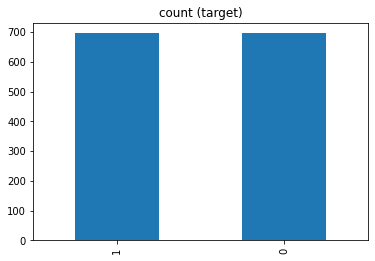

In [ ]:
#undersample majority class
human_undersample = human_class.sample(bot_class_count)

undersampled_data = pd.concat([human_undersample, bot_class], axis=0)

print(undersampled_data['Bot: 4.0 Threshold'].value_counts())# plot the count after under-sampeling
undersampled_data['Bot: 4.0 Threshold'].value_counts().plot(kind='bar', title='count (target)')

In [ ]:
undersampled_data.shape

(1392, 11)

In [ ]:
#split into training, validation and test
X_bal = undersampled_data
y_bal = undersampled_data['Bot: 4.0 Threshold']

X_train_val_bal, X_test_bal, y_train_val_bal, y_test_bal = train_test_split(X_bal, y_bal, test_size=0.2, random_state=100)

X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_train_val_bal, y_train_val_bal, test_size=0.25, random_state=100)
print(f"Training target statistics: {Counter(y_train_bal)}")
print(f"Validation target statistics: {Counter(y_val_bal)}")
print(f"Testing target statistics: {Counter(y_test_bal)}")

Training target statistics: Counter({0: 433, 1: 401})
Validation target statistics: Counter({1: 162, 0: 117})
Testing target statistics: Counter({0: 146, 1: 133})


In [ ]:
print("train shape: %s" %str(X_train_bal.shape))
print("val shape: %s" %str(X_val_bal.shape))
print("test shape: %s" %str(X_test_bal.shape))

train shape: (834, 11)
val shape: (279, 11)
test shape: (279, 11)


In [ ]:
#write to file
X_train_bal.to_csv("nodes_train_balanced.csv", index=False)
X_val_bal.to_csv("nodes_validate_balanced.csv", index=False)
X_test_bal.to_csv("nodes_test_balanced.csv", index=False)

#Graph Visualisation Pre-Processing



In [4]:
import pandas as pd

n = pd.read_csv("final_cleaned_crypto_bernardamus_network_nodes.csv")
e = pd.read_csv("final_cleaned_crypto_bernardamus_network_edges.csv")

In [5]:
n.head()

,Unnamed: 0,Screen Name,Id,Age in Years,# of Followers,# of Followings,Follower/Following Ratio,URL,Verified,Number of Tweets,# of liked Tweets,# of lists,Botometer,Bot: 3.5 Threshold,Bot: 4.0 Threshold
0,0,drumkitt87,14254757,13,321,649,0.49,0,0,3009,28401,6,0.7,0,0
1,1,cryptomichnl,146008010,11,181300,536,338.25,1,0,57312,43979,2367,0.9,0,0
2,2,fatihsk87,2665227374,7,73248,409,179.09,0,0,11859,7887,1882,0.3,0,0
3,3,sp889900,1065823520314140000,3,129,444,0.29,0,0,474,1438,0,1.6,0,0
4,4,rewardiqa,1200106100491720000,2,79551,90,883.90,1,0,45,98,14,1.6,0,0


In [6]:
e.head()

,Unnamed: 0,Source,Target,hashtag
0,0,drumkitt87,cryptomichnl,ethereum
1,1,drumkitt87,fatihsk87,ethereum
2,2,cryptomichnl,fatihsk87,ethereum
3,3,sp889900,rewardiqa,binance
4,4,sp889900,rewardiqa,rew


{ 
 "nodes": [
    { "id": A },
    { "id": B }
  ],
  "links": [
    { "source": A, "target": B }
  ]
}

In [15]:
len(n)

4924

In [52]:
nodes_dict=[]
for i in range(len(n)):
  nodes_dict.append({'id': n['Screen Name'][i], 'label': str(n['Bot: 4.0 Threshold'][i])})

In [53]:
links_dict=[]
for i in range(len(e)):
  links_dict.append({'source': e['Source'][i],'target': e['Target'][i]})

In [54]:
graph = {'nodes': nodes_dict, 'links': links_dict}

In [ ]:
graph['nodes']

In [58]:
import json

with open('graph_data.json', 'w') as outfile:
    json.dump(graph, outfile)

In [43]:
graph['links']

[{'source': 'drumkitt87', 'target': 'cryptomichnl'},
 {'source': 'drumkitt87', 'target': 'fatihsk87'},
 {'source': 'cryptomichnl', 'target': 'fatihsk87'},
 {'source': 'sp889900', 'target': 'rewardiqa'},
 {'source': 'sp889900', 'target': 'rewardiqa'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 's_saricicekli', 'target': 'tanya_4d'},
 {'source': 'george09918636', 'target': 'merotoken'},
 {'source': 'ah_laylah', 'target': 'yusuf_a_j'},
 {'source': 'mikedarocha2', 'target': 'bitsler'},
 {'source': 'mikedarocha2', 'target': 'bitsler'},
 {'source': 'mikedarocha2', 'target': 'bitsler'},
 {'source': 'mikedarocha2', 'target': 'bitsler'},
 {'source': 'mgogitidze02', 't